In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [2]:
(x_train, y_train),(x_test, y_test) = fashion_mnist.load_data()

x_train=x_train.reshape(-1, 28, 28, 1)
x_test=x_test.reshape(-1, 28, 28, 1)

print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28, 1) (10000, 28, 28, 1)
(60000,) (10000,)


In [3]:
cnn = Sequential()

cnn.add(Conv2D(input_shape=(28,28,1), kernel_size=(3,3),
               filters=32, activation='relu'))
cnn.add(Conv2D(kernel_size=(3,3), filters=64, activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())

cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10, activation='softmax'))

In [4]:
cnn.compile(loss='sparse_categorical_crossentropy',
            optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [5]:
hist = cnn.fit(x_train, y_train, batch_size=128, 
               epochs=30, validation_data=(x_test, y_test))

Epoch 1/30
469/469 [==============================] - 37s 9ms/step - loss: 0.7337 - accuracy: 0.7423 - val_loss: 0.3386 - val_accuracy: 0.8776
Epoch 2/30
469/469 [==============================] - 4s 8ms/step - loss: 0.3590 - accuracy: 0.8736 - val_loss: 0.2859 - val_accuracy: 0.8972
Epoch 3/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2989 - accuracy: 0.8913 - val_loss: 0.2662 - val_accuracy: 0.9021
Epoch 4/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2659 - accuracy: 0.9044 - val_loss: 0.2424 - val_accuracy: 0.9110
Epoch 5/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2369 - accuracy: 0.9112 - val_loss: 0.2347 - val_accuracy: 0.9140
Epoch 6/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2208 - accuracy: 0.9189 - val_loss: 0.2188 - val_accuracy: 0.9182
Epoch 7/30
469/469 [==============================] - 4s 8ms/step - loss: 0.2018 - accuracy: 0.9255 - val_loss: 0.2175 - val_accuracy: 0.9211
Epoch

In [6]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2663 - accuracy: 0.9325


[0.2662705183029175, 0.9325000047683716]

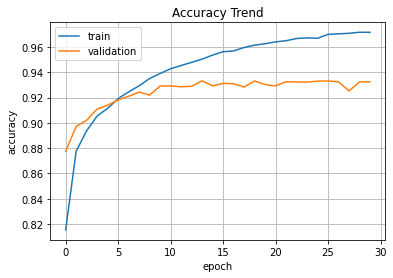

In [7]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()

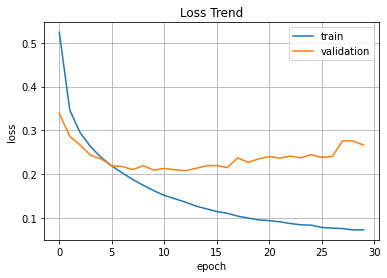

In [8]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validation'], loc='best')
plt.grid()
plt.show()